In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'raw-data/cities.csv'
df = pd.read_csv(path)
dft = df.T.reset_index()
city_labels = list(dft.iloc[2])
dft.columns = city_labels

In [3]:
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,254502.0,256327.0,...,705135.0,708951.0,712600.0,717893.0,723668.0,728128.0,731573.0,735888.0,740953.0,747396.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,248084.0,248328.0,...,932553.0,957576.0,973265.0,984791.0,988760.0,993971.0,1000492.0,1006305.0,1016479.0,1034423.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,110965.0,110963.0,...,226699.0,231790.0,237311.0,241539.0,245188.0,247690.0,250565.0,253579.0,257034.0,261504.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,166073.0,166413.0,...,282451.0,285009.0,288422.0,290777.0,293042.0,295849.0,298509.0,301163.0,302725.0,304905.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,116912.0,117096.0,...,246897.0,252366.0,258136.0,261996.0,266150.0,269851.0,274610.0,279429.0,283966.0,289763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22368,12973,29449,Newcastle,City,NE,NE,Sioux City,Dixon County,NaN,NaN,...,75872.0,75595.0,75357.0,74720.0,75301.0,76240.0,78027.0,79078.0,79965.0,80122.0
22369,48550,29449,Winton,City,MN,MN,Duluth,Saint Louis County,NaN,NaN,...,85347.0,86742.0,87219.0,86827.0,87303.0,87337.0,88064.0,88526.0,90119.0,92491.0
22370,24470,29449,Eakly,City,OK,OK,NaN,Caddo County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87439.0
22371,5133,29449,Hermitage,City,MO,MO,NaN,Hickory County,NaN,NaN,...,120247.0,122862.0,125248.0,127249.0,128765.0,130810.0,132784.0,134674.0,136654.0,137908.0


In [4]:
is_california = df['State'] == 'CA'
ca_df = df[is_california]

In [5]:
dft = dft.reset_index()
dft

,index,RegionName,New York,Los Angeles,Houston,Chicago,San Antonio,Philadelphia,Phoenix,Las Vegas,...,Medicine Park,Miramiguoa Park,Maud,Fort Montgomery,Broad Top,Newcastle,Winton,Eakly,Hermitage,New Paris
0,0,RegionID,6181,12447,39051,17426,6915,13271,40326,18959,...,22420,174012,49589,52073,51148,12973,48550,24470,5133,33089
1,1,SizeRank,0,1,2,3,4,5,6,7,...,29449,29449,29449,29449,29449,29449,29449,29449,29449,29449
2,2,RegionName,New York,Los Angeles,Houston,Chicago,San Antonio,Philadelphia,Phoenix,Las Vegas,...,Medicine Park,Miramiguoa Park,Maud,Fort Montgomery,Broad Top,Newcastle,Winton,Eakly,Hermitage,New Paris
3,3,RegionType,City,City,City,City,City,City,City,City,...,City,City,City,City,City,City,City,City,City,City
4,4,StateName,NY,CA,TX,IL,TX,PA,AZ,NV,...,OK,MO,TX,NY,PA,NE,MN,OK,MO,PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,270,2021-11-30,728128.0,993971.0,247690.0,295849.0,269851.0,222438.0,396777.0,403152.0,...,203725.0,NaN,98796.0,398136.0,147613.0,76240.0,87337.0,NaN,130810.0,168169.0
271,271,2021-12-31,731573.0,1000492.0,250565.0,298509.0,274610.0,223400.0,401915.0,409923.0,...,205189.0,128439.0,100420.0,401427.0,149841.0,78027.0,88064.0,NaN,132784.0,170902.0
272,272,2022-01-31,735888.0,1006305.0,253579.0,301163.0,279429.0,223909.0,406758.0,420052.0,...,207562.0,131437.0,102373.0,407725.0,151444.0,79078.0,88526.0,NaN,134674.0,173523.0
273,273,2022-02-28,740953.0,1016479.0,257034.0,302725.0,283966.0,224345.0,414423.0,430658.0,...,210838.0,133823.0,104477.0,413154.0,154336.0,79965.0,90119.0,NaN,136654.0,175628.0


In [6]:
my_cities = ca_df['RegionName'] == 'Newport Beach', 'Yucaipa', 'Los Angeles', 'Orange', 'Redlands', 'Beaumont'

In [7]:

ca_df.loc[ca_df['RegionName'] == 'Yucaipa']


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
994,21417,1024,Yucaipa,City,CA,CA,Riverside-San Bernardino-Ontario,San Bernardino County,155381.0,156287.0,...,471809.0,482870.0,492807.0,504461.0,510079.0,515183.0,520533.0,528236.0,536615.0,543572.0


In [8]:
ca_df = ca_df.dropna()

In [9]:
needed_cols = ca_df.columns[8:]
# needed_cols = needed_cols.insert(0, ['RegionName', 'State'])
needed_cols

Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       ...
       '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
       '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31'],
      dtype='object', length=267)

In [10]:
ca = ca_df[needed_cols].T

In [11]:
ca.columns = ca_df['RegionName']

In [12]:
ca

RegionName,Los Angeles,San Jose,San Francisco,Sacramento,Fresno,Long Beach,Oakland,Riverside,Anaheim,Santa Ana,...,Los Alamos,Yermo,Keene,Daggett,Dutch Flat,Hume,Palomar Mountain,Fawnskin,Soda Springs,Twin Bridges
2000-01-31,248084.0,405806.0,458712.0,136035.0,114677.0,209345.0,241473.0,165713.0,235526.0,211630.0,...,270323.0,66855.0,174114.0,50622.0,143723.0,94663.0,197914.0,115627.0,198698.0,169227.0
2000-02-29,248328.0,408280.0,461482.0,136555.0,114808.0,209605.0,242567.0,166158.0,237963.0,213852.0,...,269480.0,66638.0,172050.0,51429.0,143498.0,95506.0,196549.0,116051.0,199094.0,169240.0
2000-03-31,249479.0,411732.0,465095.0,137276.0,113518.0,210764.0,244485.0,166671.0,239550.0,215406.0,...,270663.0,66752.0,169259.0,52107.0,144773.0,95638.0,192513.0,115568.0,200624.0,170031.0
2000-04-30,251632.0,421809.0,472763.0,138494.0,112710.0,212904.0,251751.0,167847.0,242899.0,218560.0,...,270595.0,67480.0,163331.0,52889.0,146577.0,95753.0,192708.0,115597.0,203277.0,171242.0
2000-05-31,254256.0,431372.0,481175.0,139854.0,111802.0,215309.0,262078.0,169282.0,245778.0,221390.0,...,272116.0,68077.0,159222.0,52856.0,148715.0,95301.0,194348.0,115537.0,205431.0,174447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,993971.0,1442134.0,1654774.0,482305.0,355562.0,830172.0,1051951.0,587194.0,836396.0,773902.0,...,767940.0,129765.0,524940.0,144272.0,377347.0,326015.0,441217.0,460220.0,872378.0,419654.0
2021-12-31,1000492.0,1463307.0,1662305.0,484881.0,357684.0,835643.0,1056140.0,590755.0,851329.0,786309.0,...,775804.0,130947.0,526125.0,149014.0,379219.0,324036.0,451269.0,469016.0,883425.0,417964.0
2022-01-31,1006305.0,1491682.0,1670361.0,492425.0,363080.0,841215.0,1069297.0,601284.0,871273.0,804182.0,...,785514.0,136002.0,529381.0,152769.0,379777.0,328425.0,456743.0,481402.0,897959.0,425073.0
2022-02-28,1016479.0,1530370.0,1694246.0,500731.0,368700.0,849337.0,1085385.0,614075.0,889462.0,820322.0,...,803189.0,142198.0,533772.0,157170.0,383437.0,329906.0,458559.0,497020.0,905204.0,426337.0


Text(0, 0.5, 'Median SFH Price')

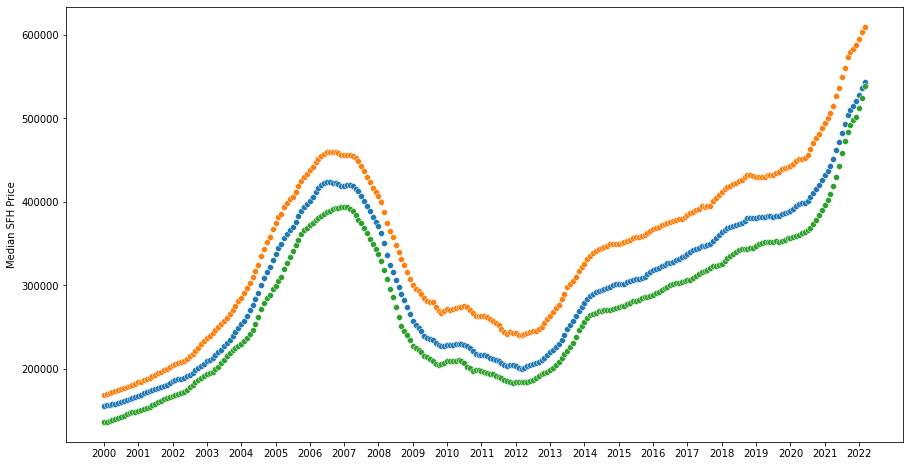

In [23]:
plt.figure(figsize=(15,8));
# output = sns.scatterplot(x=ca.index, y = ca.T.loc["Newport Beach"]);
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1));
sns.scatterplot(x=ca.index, y = ca.T.loc["Yucaipa"]);
# sns.scatterplot(x=ca.index, y = ca.T.loc["Los Angeles"]);
sns.scatterplot(x=ca.index, y = ca.T.loc["Redlands"]);
# sns.scatterplot(x=ca.index, y = ca.T.loc["Banning"]);
sns.scatterplot(x=ca.index, y = ca.T.loc["Beaumont"]);

plt.ylabel('Median SFH Price')
